### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

### Knowing the data

In [2]:
df = pd.read_csv('./customer_churn_data.csv')
df.head(3)

,customer_id,age,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,customer_satisfaction,support_calls,churn
0,CUST_000001,52,Male,0,Yes,Yes,7,Yes,No,Fiber optic,...,Yes,No,One year,Yes,Electronic check,39.18,294.66,4,3,No
1,CUST_000002,42,Male,0,Yes,No,32,Yes,No,No,...,No internet service,No internet service,One year,Yes,Electronic check,40.36,1286.75,3,1,No
2,CUST_000003,54,Male,0,No,Yes,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,No,Bank transfer (automatic),84.77,947.09,2,3,Yes


In [3]:
df.shape

(10000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  object 
 15  str

In [5]:
df.isnull().sum()

customer_id              0
age                      0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
internet_service         0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
contract                 0
paperless_billing        0
payment_method           0
monthly_charges          0
total_charges            0
customer_satisfaction    0
support_calls            0
churn                    0
dtype: int64

In [6]:
df.describe()

,age,senior_citizen,tenure,monthly_charges,total_charges,customer_satisfaction,support_calls
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.662500,0.092300,22.216800,53.640204,1192.146321,3.399300,2.007400
std,14.397976,0.289463,19.963232,17.047669,1193.960345,1.069193,1.415184
min,18.000000,0.000000,1.000000,20.050000,20.320000,1.000000,0.000000
25%,34.000000,0.000000,6.000000,40.407500,306.305000,3.000000,1.000000
50%,44.000000,0.000000,16.000000,51.770000,796.955000,3.000000,2.000000
75%,55.000000,0.000000,33.000000,66.280000,1681.077500,4.000000,3.000000
max,80.000000,1.000000,72.000000,111.810000,7078.800000,5.000000,9.000000


In [7]:
df.dtypes

customer_id               object
age                        int64
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
internet_service          object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
contract                  object
paperless_billing         object
payment_method            object
monthly_charges          float64
total_charges            float64
customer_satisfaction      int64
support_calls              int64
churn                     object
dtype: object

# Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

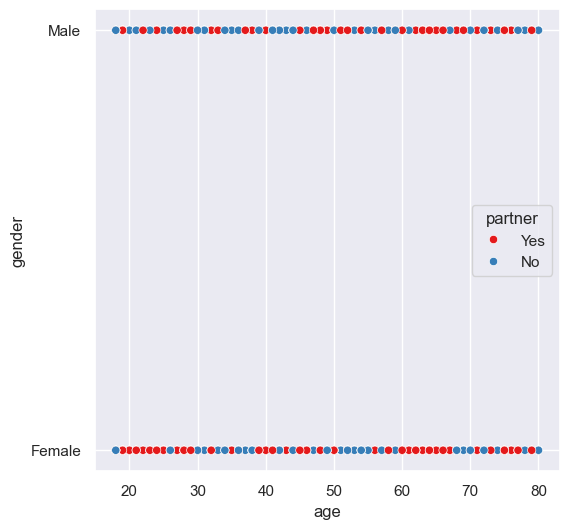

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,6))
sns.scatterplot(x='age', y='gender', data=df, hue='partner', palette='Set1')
plt.show()

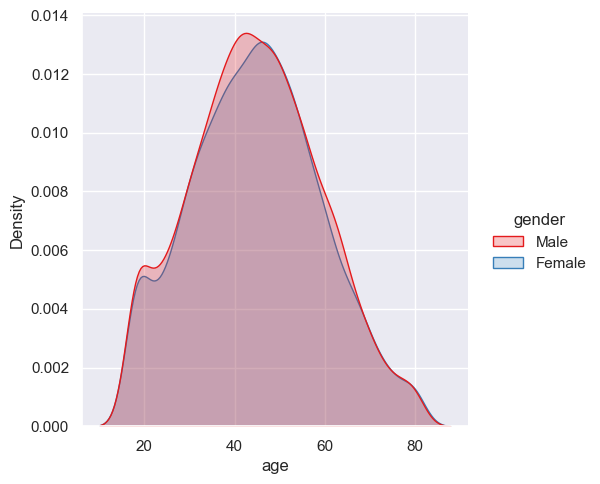

In [ ]:
sns.displot(data=df, x='age', hue='gender', kind='kde', fill=True, palette='Set1')
plt.show()

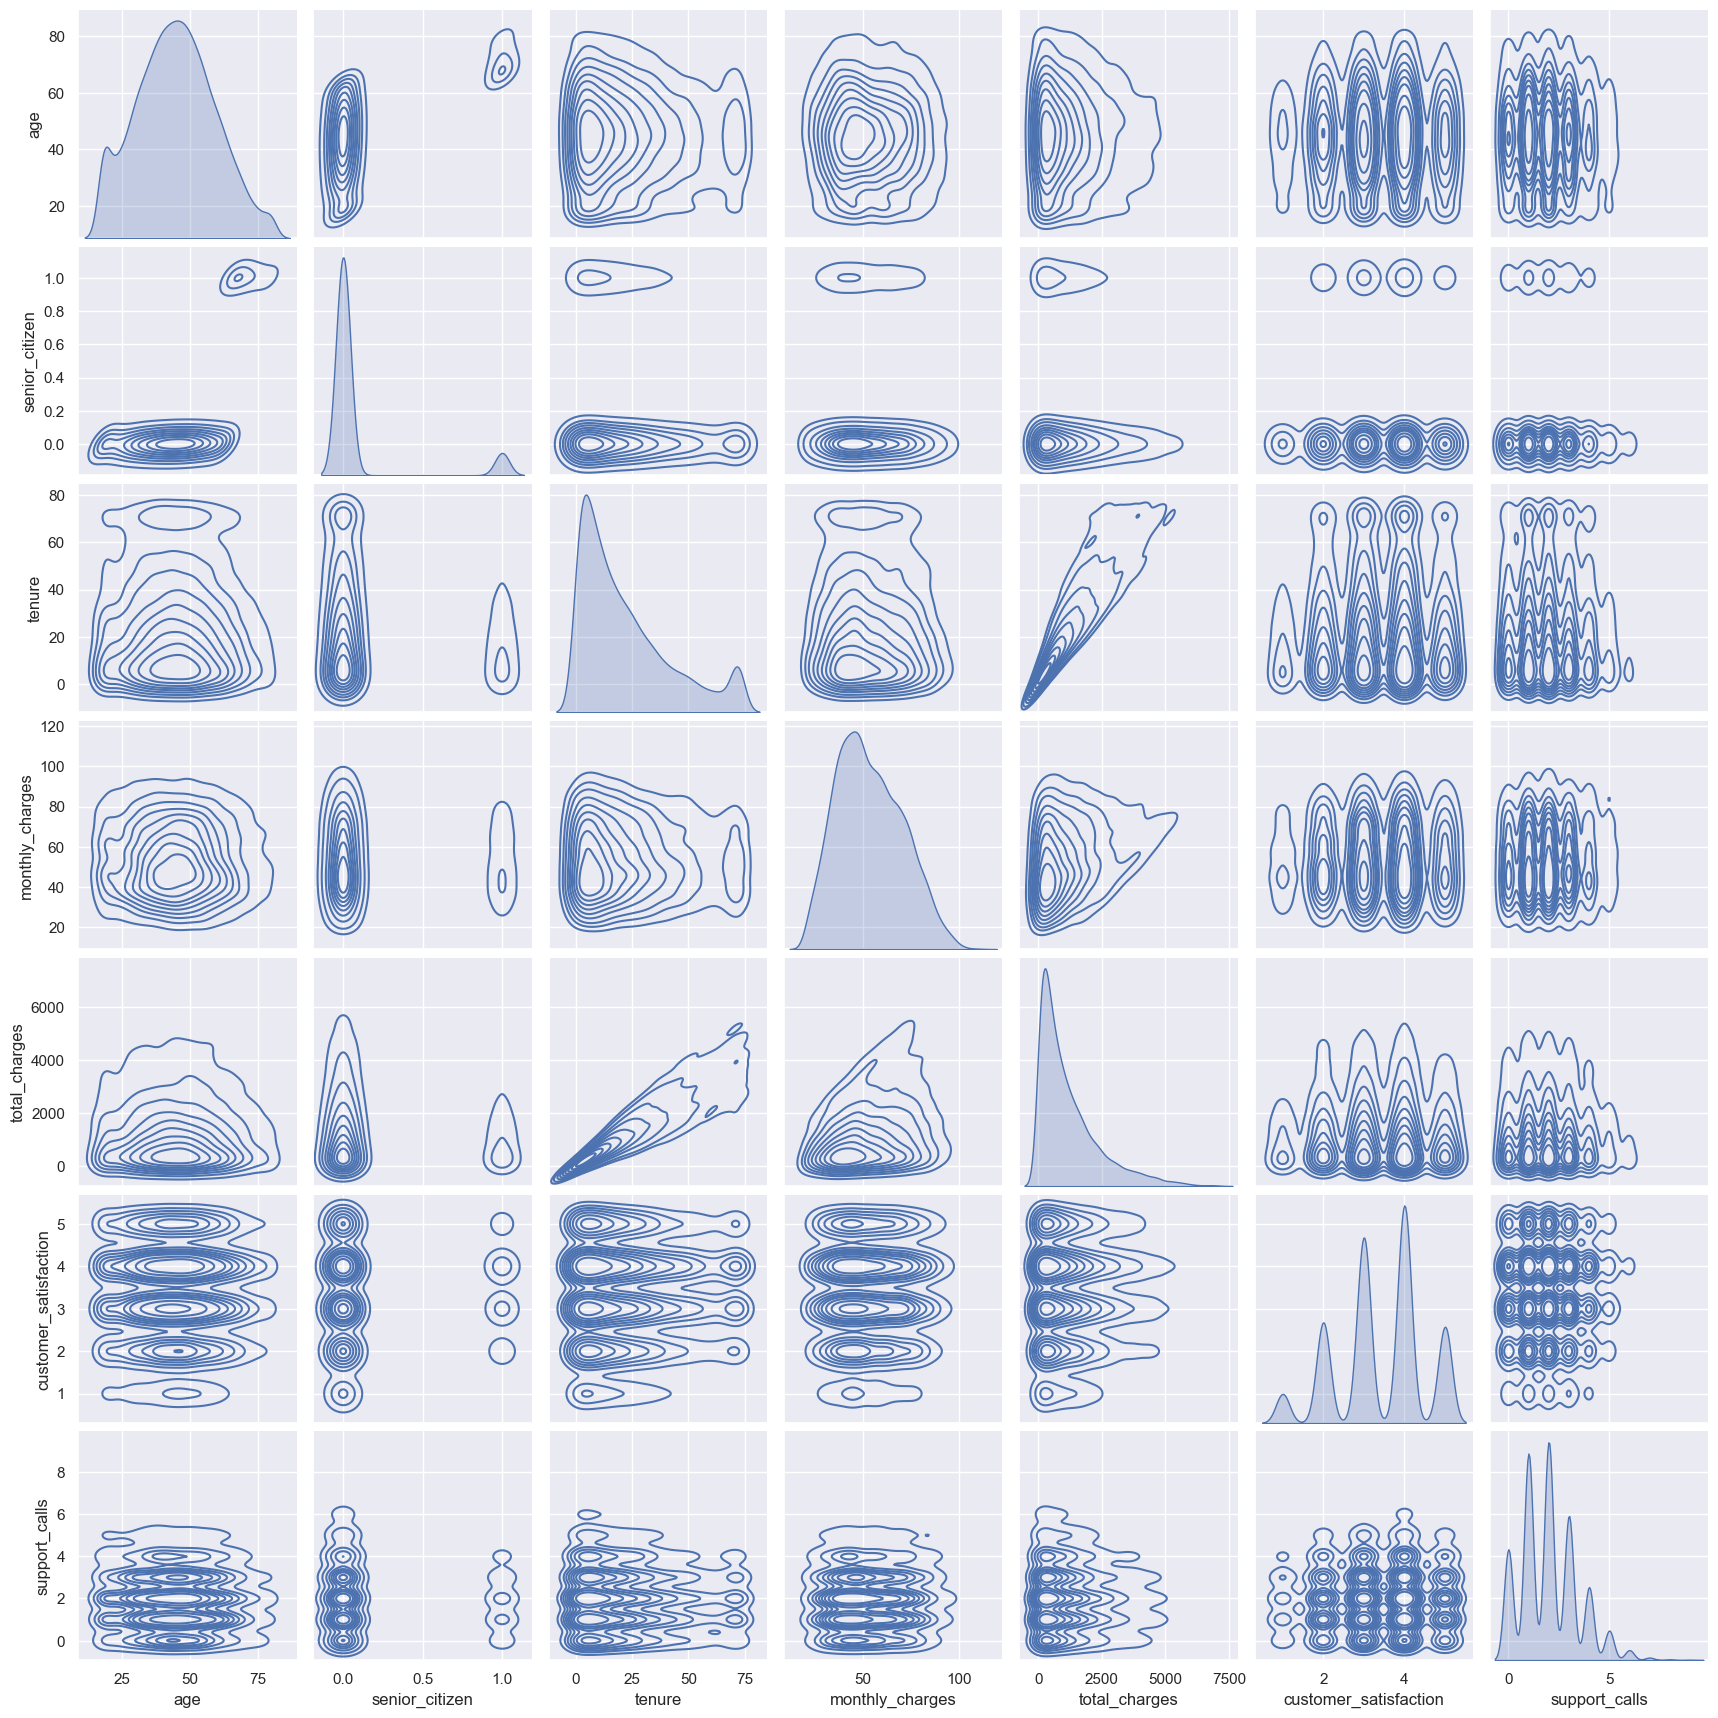

In [26]:
sns.pairplot(df, kind='kde')
plt.show()

### Cleaning the data

In [27]:
df.drop(columns=['customer_id'], axis=1,inplace=True)

In [28]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)

['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn']


In [29]:
from sklearn.preprocessing import LabelEncoder

for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in ['tenure', 'monthly_charges', 'total_charges']:
    df[col] = scaler.fit_transform(df[[col]])

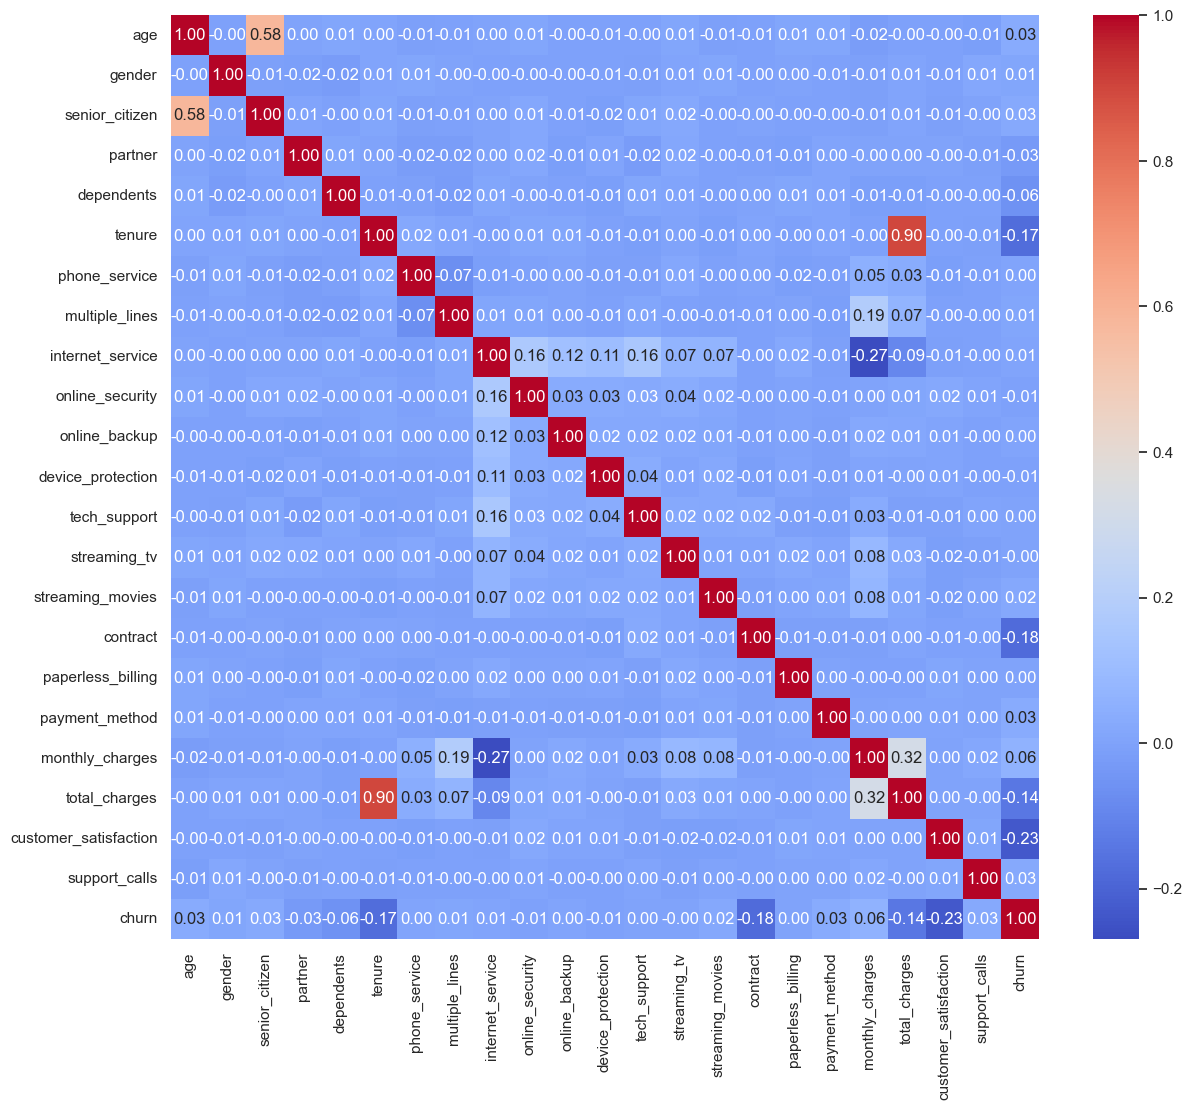

In [43]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Model training

In [56]:
from sklearn.model_selection import train_test_split
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Logistic Regression

In [88]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Logistic Regression Precission: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, y_pred_lr):.2f}")

Logistic Regression Accuracy: 0.78
Logistic Regression Precission: 0.60
Logistic Regression Recall: 0.20
Logistic Regression F1 Score: 0.30


c:\Users\mayan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [89]:
dtree = DecisionTreeClassifier(max_depth=100, max_features='log2')
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dtree):.2f}")
print(f"Decision Tree Precission: {precision_score(y_test, y_pred_dtree):.2f}")
print(f"Decision Tree Recall: {recall_score(y_test, y_pred_dtree):.2f}")
print(f"Decision Tree F1 Score: {f1_score(y_test, y_pred_dtree):.2f}")

Decision Tree Accuracy: 0.70
Decision Tree Precission: 0.36
Decision Tree Recall: 0.37
Decision Tree F1 Score: 0.37


## Random Forest

In [90]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Random Forest Precission: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"Random Forest F1 Score: {f1_score(y_test, y_pred_rf):.2f}")


Random Forest Accuracy: 0.79
Random Forest Precission: 0.61
Random Forest Recall: 0.23
Random Forest F1 Score: 0.33


## Support Vector Machine (SVM)

In [91]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=False, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"SVM Precission: {precision_score(y_test, y_pred_svm):.2f}")
print(f"SVM Recall: {recall_score(y_test, y_pred_svm):.2f}")
print(f"SVM F1 Score: {f1_score(y_test, y_pred_svm):.2f}")


SVM Accuracy: 0.77
SVM Precission: 0.00
SVM Recall: 0.00
SVM F1 Score: 0.00


c:\Users\mayan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
